In [249]:
import pandas as pd
import matplotlib.pyplot as plt


cpi_url = "https://raw.githubusercontent.com/WendyR20/Data-608-Story-2/refs/heads/main/cpi_data.csv"
cpi_df = pd.read_csv(cpi_url)

cpi_df.head()

,Series ID,Year,Period,Label,Value
0,CUSR0000SA0L1E,2000,M01,2000 Jan,179.3
1,CUSR0000SA0L1E,2000,M02,2000 Feb,179.4
2,CUSR0000SA0L1E,2000,M03,2000 Mar,180.0
3,CUSR0000SA0L1E,2000,M04,2000 Apr,180.3
4,CUSR0000SA0L1E,2000,M05,2000 May,180.7


In [250]:
cpi_df.tail()

,Series ID,Year,Period,Label,Value
307,CUSR0000SA0L1E,2025,M08,2025 Aug,329.700
308,CUSR0000SA0L1E,2025,M09,2025 Sep,330.418
309,CUSR0000SA0L1E,2025,M10,2025 Oct,-
310,CUSR0000SA0L1E,2025,M11,2025 Nov,331.043
311,CUSR0000SA0L1E,2025,M12,2025 Dec,331.814


In [251]:
#finding annual percent change

cpi_df.dtypes

cpi_df = cpi_df.rename(columns={'Value': 'CPI'})
cpi_df["CPI"] = pd.to_numeric(cpi_df["CPI"], errors="coerce")
cpi_df["Date"] = pd.to_datetime(cpi_df["Label"], format="%Y %b")

cpi_df = cpi_df.drop('Label', axis=1)
cpi_df.head()


,Series ID,Year,Period,CPI,Date
0,CUSR0000SA0L1E,2000,M01,179.3,2000-01-01
1,CUSR0000SA0L1E,2000,M02,179.4,2000-02-01
2,CUSR0000SA0L1E,2000,M03,180.0,2000-03-01
3,CUSR0000SA0L1E,2000,M04,180.3,2000-04-01
4,CUSR0000SA0L1E,2000,M05,180.7,2000-05-01


In [252]:
cpi_df.dtypes

Series ID            object
Year                  int64
Period               object
CPI                 float64
Date         datetime64[ns]
dtype: object

In [253]:
cpi_df["Inflation12"] = cpi_df["CPI"].pct_change(12) * 100


In [254]:
cpi_df.head()

,Series ID,Year,Period,CPI,Date,Inflation12
0,CUSR0000SA0L1E,2000,M01,179.3,2000-01-01,NaN
1,CUSR0000SA0L1E,2000,M02,179.4,2000-02-01,NaN
2,CUSR0000SA0L1E,2000,M03,180.0,2000-03-01,NaN
3,CUSR0000SA0L1E,2000,M04,180.3,2000-04-01,NaN
4,CUSR0000SA0L1E,2000,M05,180.7,2000-05-01,NaN


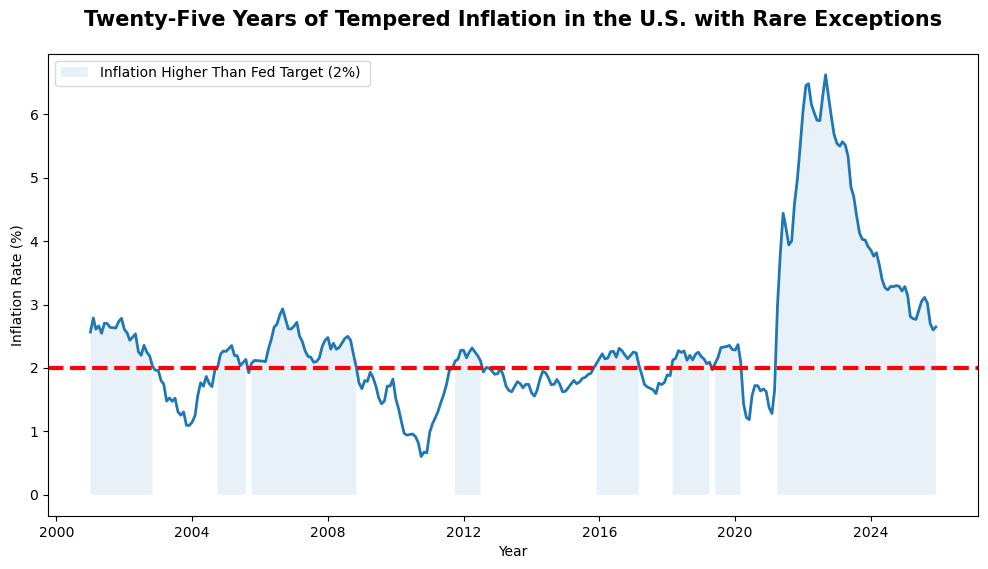

In [255]:
#creating a graph for the inflation rate (change in cpi)

plt.figure(figsize=(12,6))

plt.plot(
    cpi_df["Date"],
    cpi_df["Inflation12"],
    linewidth=2
)

# Fed target line
plt.axhline(y=2, linestyle="--", linewidth=3.0, color = 'r')

# Highlight high inflation
high = cpi_df["Inflation12"] > 2

plt.fill_between(
    cpi_df["Date"],
    cpi_df["Inflation12"],
    where=high,
    alpha=0.1,
    label='Inflation Higher Than Fed Target (2%) '
)

plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title("Twenty-Five Years of Tempered Inflation in the U.S. with Rare Exceptions", fontsize=15, fontweight='bold', pad=20)

plt.legend()
plt.show()

In [256]:
unemp_url = "https://raw.githubusercontent.com/WendyR20/Data-608-Story-2/refs/heads/main/unemployment_rates.csv"
unemp_df = pd.read_csv(unemp_url)

unemp_df.head()

,Series ID,Year,Period,Label,Value
0,LNS14000000,2000,M01,2000 Jan,4.0
1,LNS14000000,2000,M02,2000 Feb,4.1
2,LNS14000000,2000,M03,2000 Mar,4.0
3,LNS14000000,2000,M04,2000 Apr,3.8
4,LNS14000000,2000,M05,2000 May,4.0


In [257]:
unemp_df.dtypes


Series ID    object
Year          int64
Period       object
Label        object
Value        object
dtype: object

In [258]:
unemp_df["Date"] = pd.to_datetime(unemp_df["Label"], format="%Y %b")

In [259]:
unemp_df = unemp_df.rename(columns={'Value': 'Unemployment_Rate'})

In [260]:
unemp_df = unemp_df.drop('Label', axis=1)
unemp_df.head()

,Series ID,Year,Period,Unemployment_Rate,Date
0,LNS14000000,2000,M01,4.0,2000-01-01
1,LNS14000000,2000,M02,4.1,2000-02-01
2,LNS14000000,2000,M03,4.0,2000-03-01
3,LNS14000000,2000,M04,3.8,2000-04-01
4,LNS14000000,2000,M05,4.0,2000-05-01


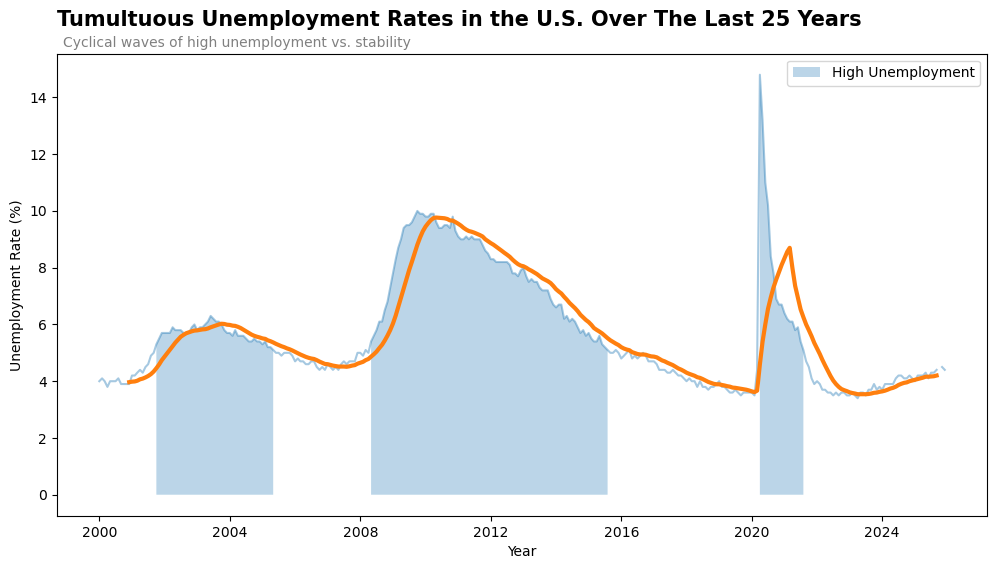

In [261]:
#creating a graph of the unemployment rate

#first have to convert unemployment rate to numeric type
unemp_df["Unemployment_Rate"] = pd.to_numeric(unemp_df["Unemployment_Rate"], errors="coerce")


unemp_df["Smooth"] = unemp_df["Unemployment_Rate"].rolling(12).mean()

plt.figure(figsize=(12,6))

plt.plot(unemp_df["Date"], unemp_df["Unemployment_Rate"], alpha=0.4)

plt.plot(unemp_df["Date"], unemp_df["Smooth"], linewidth=3)

# highlighting an a high unemployment rate
high = unemp_df["Unemployment_Rate"] > 5

plt.fill_between(
    unemp_df["Date"],
    unemp_df["Unemployment_Rate"],
    where=high,
    alpha=0.3,
    label='High Unemployment'
)

plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Tumultuous Unemployment Rates in the U.S. Over The Last 25 Years", 
          fontsize=15, fontweight='bold',loc='left', pad=20)
plt.suptitle("Cyclical waves of high unemployment vs. stability", 
             x=0.13, y=0.91, ha='left', fontsize=10, color='gray')

plt.legend()

plt.show()

In [262]:
#importing fed fund rates

ffr_url = "https://raw.githubusercontent.com/WendyR20/Data-608-Story-2/refs/heads/main/FEDFUNDS.csv"
ffr_df = pd.read_csv(ffr_url)

ffr_df.head()

,observation_date,FEDFUNDS
0,2000-01-01,5.45
1,2000-02-01,5.73
2,2000-03-01,5.85
3,2000-04-01,6.02
4,2000-05-01,6.27


In [263]:
ffr_df.dtypes

observation_date     object
FEDFUNDS            float64
dtype: object

In [264]:
ffr_df['observation_date'] = pd.to_datetime(ffr_df['observation_date'])

In [265]:
ffr_df = ffr_df.rename(columns={'observation_date': 'Date'})
ffr_df.head()

,Date,FEDFUNDS
0,2000-01-01,5.45
1,2000-02-01,5.73
2,2000-03-01,5.85
3,2000-04-01,6.02
4,2000-05-01,6.27


In [266]:
ffr_df.tail()

,Date,FEDFUNDS
307,2025-08-01,4.33
308,2025-09-01,4.22
309,2025-10-01,4.09
310,2025-11-01,3.88
311,2025-12-01,3.72


In [267]:
ffr_df.dtypes

Date        datetime64[ns]
FEDFUNDS           float64
dtype: object

In [268]:
#merging the data frames together

merged = cpi_df.merge(unemp_df, on="Date")

merged = merged.merge(ffr_df, on="Date")


merged.head()

,Series ID_x,Year_x,Period_x,CPI,Date,Inflation12,Series ID_y,Year_y,Period_y,Unemployment_Rate,Smooth,FEDFUNDS
0,CUSR0000SA0L1E,2000,M01,179.3,2000-01-01,NaN,LNS14000000,2000,M01,4.0,NaN,5.45
1,CUSR0000SA0L1E,2000,M02,179.4,2000-02-01,NaN,LNS14000000,2000,M02,4.1,NaN,5.73
2,CUSR0000SA0L1E,2000,M03,180.0,2000-03-01,NaN,LNS14000000,2000,M03,4.0,NaN,5.85
3,CUSR0000SA0L1E,2000,M04,180.3,2000-04-01,NaN,LNS14000000,2000,M04,3.8,NaN,6.02
4,CUSR0000SA0L1E,2000,M05,180.7,2000-05-01,NaN,LNS14000000,2000,M05,4.0,NaN,6.27


In [269]:
merged.tail()

,Series ID_x,Year_x,Period_x,CPI,Date,Inflation12,Series ID_y,Year_y,Period_y,Unemployment_Rate,Smooth,FEDFUNDS
307,CUSR0000SA0L1E,2025,M08,329.700,2025-08-01,3.111806,LNS14000000,2025,M08,4.3,4.175,4.33
308,CUSR0000SA0L1E,2025,M09,330.418,2025-09-01,3.019967,LNS14000000,2025,M09,4.4,4.200,4.22
309,CUSR0000SA0L1E,2025,M10,NaN,2025-10-01,2.700082,LNS14000000,2025,M10,NaN,NaN,4.09
310,CUSR0000SA0L1E,2025,M11,331.043,2025-11-01,2.599045,LNS14000000,2025,M11,4.5,NaN,3.88
311,CUSR0000SA0L1E,2025,M12,331.814,2025-12-01,2.646485,LNS14000000,2025,M12,4.4,NaN,3.72


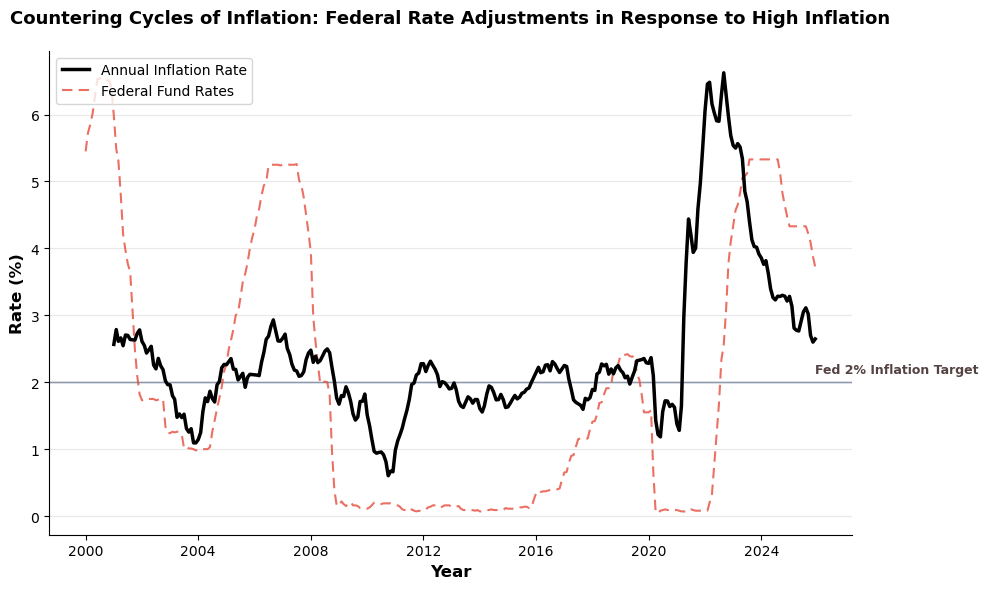

In [270]:


fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.spines[['top', 'right']].set_visible(False)


ax.plot(merged["Date"], merged["Inflation12"], 
        color='black',       
        linewidth=2.5, 
        label='Annual Inflation Rate',
        zorder=3)


ax.plot(merged["Date"], merged["FEDFUNDS"], 
        color='#E74C3C',       
        linewidth=1.5, 
        linestyle='--', 
        dashes=(5, 3),         
        alpha=0.8,
        label='Federal Fund Rates')


ax.legend(loc='upper left', frameon=True, fontsize=10 )

# Add a subtle 2% reference line
ax.axhline(2, color='#384F73', linestyle='-', linewidth=1, alpha=0.9, zorder=1)

# Add a tiny label right on the line at the very end (right side)
ax.text(merged["Date"].max(), 2.1, 'Fed 2% Inflation Target', 
        color='#554343', fontsize=9, fontweight='bold', va='bottom')


ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)


ax.set_ylabel("Rate (%)", fontweight='bold', fontsize = 12)
ax.set_xlabel("Year", fontweight='bold', fontsize = 12)

plt.title("Countering Cycles of Inflation: Federal Rate Adjustments in Response to High Inflation",
         fontweight='bold', fontsize = 13, pad = 20)
plt.suptitle("" Over the Last 25 Years", 
          fontsize=11,x=0.055, y=0.88, ha='left', color = 'gray')

plt.tight_layout()
plt.show()

In [271]:
#cleaning the merged dataframe

merged = merged.drop('Year_x', axis=1)
merged= merged.rename(columns={'Year_y': 'Year'})

merged.head()

,Series ID_x,Period_x,CPI,Date,Inflation12,Series ID_y,Year,Period_y,Unemployment_Rate,Smooth,FEDFUNDS
0,CUSR0000SA0L1E,M01,179.3,2000-01-01,NaN,LNS14000000,2000,M01,4.0,NaN,5.45
1,CUSR0000SA0L1E,M02,179.4,2000-02-01,NaN,LNS14000000,2000,M02,4.1,NaN,5.73
2,CUSR0000SA0L1E,M03,180.0,2000-03-01,NaN,LNS14000000,2000,M03,4.0,NaN,5.85
3,CUSR0000SA0L1E,M04,180.3,2000-04-01,NaN,LNS14000000,2000,M04,3.8,NaN,6.02
4,CUSR0000SA0L1E,M05,180.7,2000-05-01,NaN,LNS14000000,2000,M05,4.0,NaN,6.27


In [272]:
#making a dataframe with annual 

annual = merged.groupby("Year")[["Inflation12", "Unemployment_Rate"]].mean().reset_index()


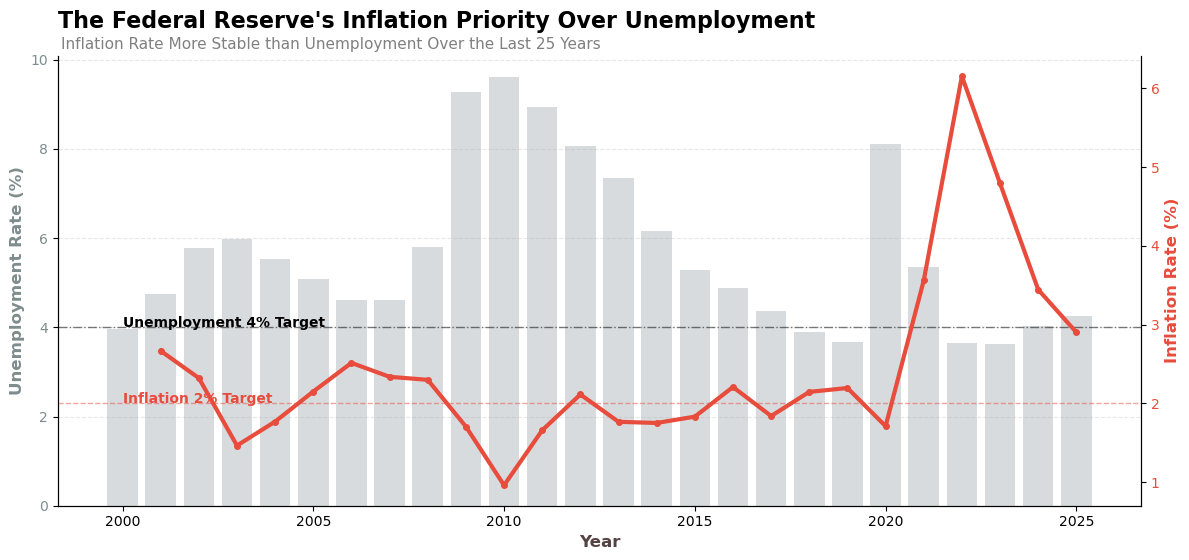

In [214]:
#inflation vs unemployment rates

fig, ax1 = plt.subplots(figsize=(12, 6), dpi=100)


ax1.bar(annual["Year"], annual["Unemployment_Rate"], 
        color='#bdc3c7', alpha=0.6, label='Unemployment Rate')
ax1.set_xlabel('Year', fontweight='bold',fontsize=12, color='#554343')
ax1.set_ylabel('Unemployment Rate (%)', fontweight='bold', fontsize=12, color='#7f8c8d')
ax1.tick_params(axis='y', labelcolor='#7f8c8d')

ax1.axhline(4, color='black', linestyle='-.', linewidth=1, alpha=0.5)
ax1.text(annual["Year"].min(), 4.0, 'Unemployment 4% Target', color='black', fontsize=10, fontweight='bold')

ax2 = ax1.twinx() 


ax2.plot(annual["Year"], annual["Inflation12"], 
         color='#e74c3c', linewidth=3, marker='o', markersize=4, label='Inflation Rate')
ax2.set_ylabel('Inflation Rate (%)', fontweight='bold', fontsize=12, color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

ax2.axhline(2, color='#e74c3c', linestyle='--', linewidth=1, alpha=0.5)
ax2.text(annual["Year"].min(), 2.0, 'Inflation 2% Target', color='#e74c3c', fontsize=10, fontweight='bold')


plt.title("The Federal Reserve's Inflation Priority Over Unemployment", 
          fontsize=16, fontweight='bold', loc='left', pad=20)
plt.suptitle("Inflation Rate More Stable than Unemployment Over the Last 25 Years", 
          fontsize=11,x=0.055, y=0.88, ha='left', color = 'gray')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

fig.tight_layout()
plt.show()

